<a href="https://colab.research.google.com/github/krithi65/data-science-tasks/blob/main/data_science_task_user_adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's
personal workspace
○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)
○ ORG_INVITE: invited to an organization (as a full member)
○ SIGNUP: signed up via the website
○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)

● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).
2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption .

In [2]:
#let first import the libraries from python package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target-visited column and features-11 columns

In [3]:
#import data set from takehome_users
df1=pd.read_csv("/content/takehome_users.csv",encoding='ISO-8859-1')
df1.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df1.shape

(12000, 10)

In [4]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [6]:
df2=pd.read_csv("/content/takehome_user_engagement.csv")
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
data = pd.merge(df1, df2 ,left_on='object_id' , right_on='user_id')
data.head(2)
data.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'user_id', 'visited'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   object_id                   207917 non-null  int64         
 1   creation_time               207917 non-null  object        
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  object        
 11  user_id                     207917 non-

In [26]:
data.dtypes

object_id                              int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                            object
user_id                                int64
visited                                int64
date                          datetime64[ns]
week                                  UInt32
year                                  UInt32
month                                  int64
dtype: object

In [24]:
data.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
time_stamp                        0
user_id                           0
visited                           0
date                              0
week                              0
year                              0
month                             0
dtype: int64

there is no nullobjects .so data is cleaned 

In [8]:
# creating time stamp and extract data from time stamp
data['date'] = data['time_stamp'].astype('datetime64')
data['week'] = data['date'].dt.isocalendar().week
data['year'] = data['date'].dt.isocalendar().year
data['month'] =data['date'].dt.month


grouping data with group_by 
user id and org id  to make it clear

In [9]:
#group required data with month,year,week
grouped_data=data.groupby(['user_id','org_id','year' ,'month', 'week' , 'visited']).size()
df3 = grouped_data.to_frame(name = 'weekly_visited').reset_index()
print(df3.info)

<bound method DataFrame.info of        user_id  org_id  year  month  week  visited  weekly_visited
0            1      11  2014      4    17        1               1
1            2       1  2013     11    46        1               1
2            2       1  2013     11    48        1               1
3            2       1  2013     12    50        1               1
4            2       1  2013     12    52        1               1
...        ...     ...   ...    ...   ...      ...             ...
75928    11996      89  2013      9    36        1               1
75929    11997     200  2013      1     3        1               1
75930    11998      83  2014      4    17        1               1
75931    11999       6  2012      6    22        1               1
75932    12000       0  2014      1     4        1               1

[75933 rows x 7 columns]>


In [10]:
#Filtering the "weekly_visit" by 3 or more times of visit
more_three = df3[df3['weekly_visited'] >= 3]
more_three

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5
...,...,...,...,...,...,...,...
75886,11975,31,2014,5,21,1,3
75905,11988,114,2014,3,12,1,4
75912,11988,114,2014,4,18,1,3
75915,11988,114,2014,5,20,1,3


we r plotting the data in pie chart.percentage score is maintained



**VISUALIZE** **DATA**

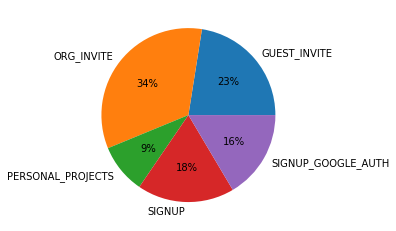

In [11]:
#take data from creation source column
source= data.groupby(['creation_source']).size()
source = source.to_frame(name = 'size').reset_index()

#plot using pie chart
y = np.array(source['size'])
label = np.array(source['creation_source'])

plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

group_by id done with user id and org id 



In [15]:
#Group user id and ord id
df2 = more_three
df2 = df2.groupby(['user_id','org_id']).size()
df2 = df2.to_frame(name = 'total_visit').reset_index()
df2

,user_id,org_id,total_visit
0,2,1,1
1,10,318,51
2,20,58,1
3,33,401,1
4,42,235,66
...,...,...,...
1411,11965,65,1
1412,11967,15,7
1413,11969,52,21
1414,11975,31,43


In [29]:
#Filtering top 25% of users and their login counts
top= df2[df2['total_visit'] >=75]
top.shape

(62, 3)

we r using bar plot to show up the top users with login counts

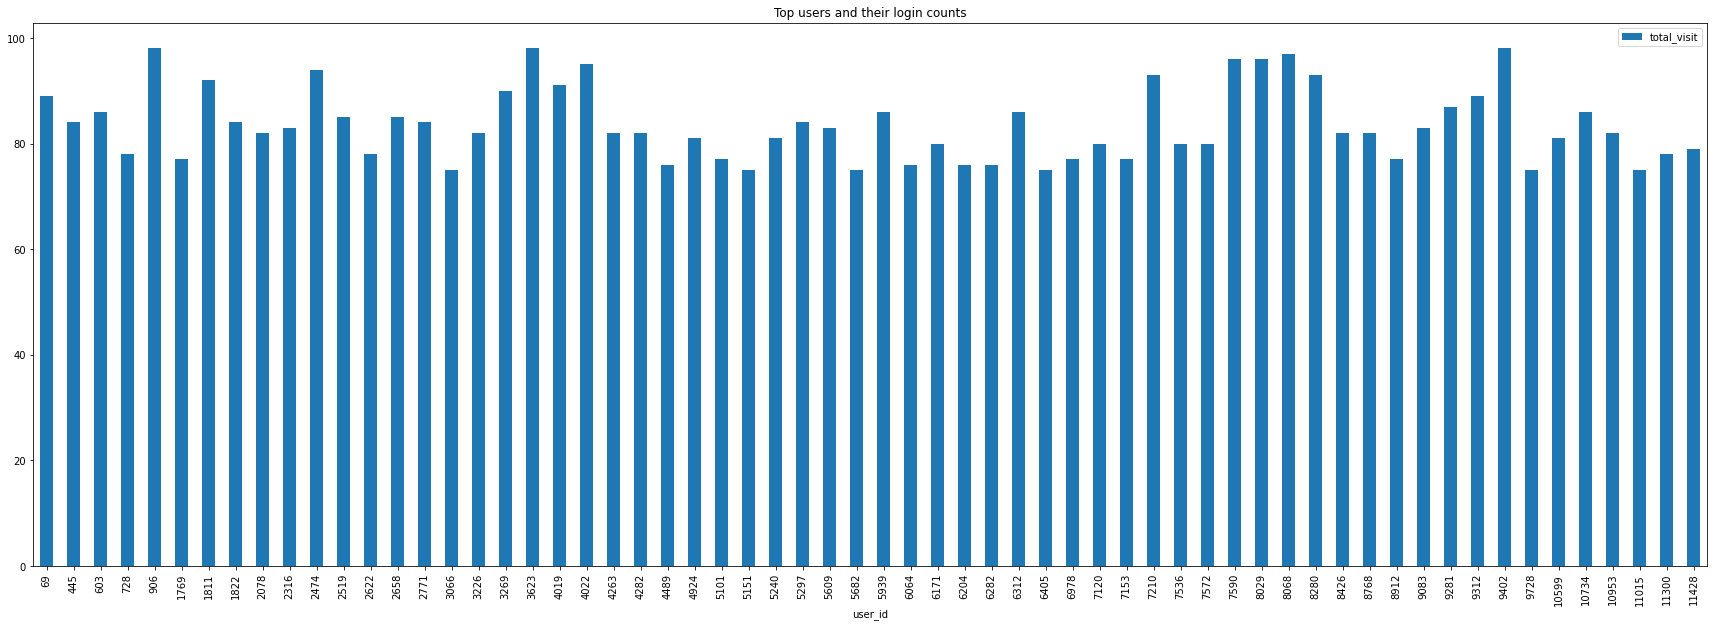

In [19]:
#Bar chart which shows Top users and their login counts
top.plot.bar(x='user_id', y='total_visit', figsize=(30,10), title="Top users and their login counts")
plt.show()

merging top users and creative source and we r visualizing data with pie chart

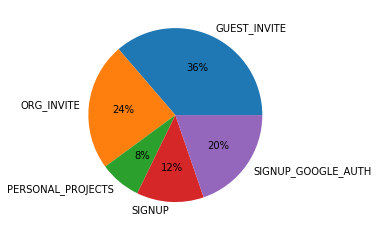

In [22]:
#Merging the actual data with the top user's data 
top_users= pd.merge(data,top,  left_on='object_id' , right_on='user_id')

cnt= top_users.groupby(['creation_source']).size()
cnt=cnt.to_frame(name='size').reset_index()

#Pie chart which shows the user adoption in top users
y=np.array(cnt['size'])
label=np.array(cnt['creation_source'])

plt.pie(y, labels= label, autopct='%1.0f%%')
plt.show()

In this we can predict that the features org_invite and guest invite
play the most important role to predict the features
with higher percentage.